## Setup

In [1]:
from manim import *

## Draw Kubernetes cluster structure

Manim Community v0.18.1

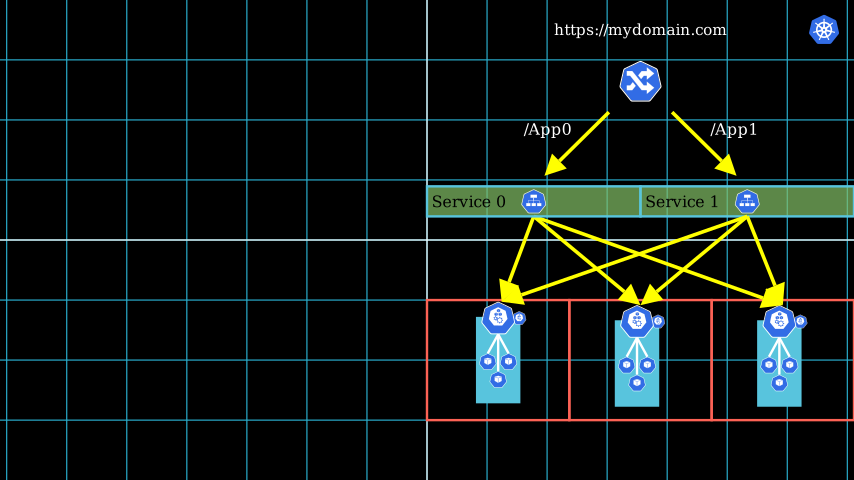

In [85]:
%%manim -ql -v ERROR Kubernetes

class Kubernetes(Scene):
    def get_kubernetes_icon(self, icon_name, path="../../assets/icons/kubernets/", extension='svg', width=1):
        icon_path = path + icon_name + "." + extension
        return SVGMobject(icon_path,width=width)

    def construct(self):
        plane = self.add(NumberPlane())
        kubernets_logo = self.get_kubernetes_icon("logo") # SVGMobject("../../assets/icons/kubernets/logo.svg")
        kubernets_logo.scale(0.5).to_edge(UR).shift(0.25*UR)
        self.add(kubernets_logo)
        # Prepare base picture
        canvas_width = self.camera.frame_width
        num_nodes = 3
        # create bounding rectangles, they won't be placed on a plane
        # smaller rectangles will be placed at their centers
        bound_rect = Rectangle(width=canvas_width*0.5/num_nodes, height=2, color=RED)
        bounding_rectangles = VGroup(*[
            bound_rect.copy()
            for k in range(num_nodes)
        ])
        bounding_rectangles.arrange(RIGHT, buff=0).shift(bounding_rectangles.width/2*RIGHT).shift(2*DOWN)
        self.add(bounding_rectangles)
        # Create and position the rectangles at the center of the most left bounding rectangles
        nodes = VGroup(*[
            VGroup(Rectangle(width=1, height=2, color=BLUE,fill_opacity=1).scale(0.7).move_to(bounding_rectangles[0].get_center()))
            for k in range(num_nodes)
        ])
        nodeicon = self.get_kubernetes_icon("node") # SVGMobject("../../assets/icons/kubernets/infrastructure_components/unlabeled/node.svg",width=1)
        for node in nodes:
            icon=nodeicon.copy().scale_to_fit_width(node.width/3).move_to(node.get_corner(UR))
            node.add(icon)
        self.add(nodes[0])
        nodes[1].move_to(bounding_rectangles[1].get_center())
        nodes[2].move_to(bounding_rectangles[2].get_center())
        self.add(nodes[1],nodes[2])

        # Create and position the pods
        podicon = self.get_kubernetes_icon("pod") #SVGMobject("../../assets/icons/kubernets/resources/unlabeled/pod.svg",width=1)
        # Place icons in the corners of a triangle, triangle won't be displayed
        triangle = RegularPolygon(n=3,fill_opacity=0,start_angle=PI/6).scale(0.7)
        manypods = VGroup(*[
            podicon.copy().move_to(triangle.get_vertices()[i])
            for i in range(3)
        ])
        podicons = [manypods.copy(), manypods.copy(), manypods.copy()]
        for k in range(3):
            podicons[k].scale_to_fit_width(nodes[k][0].width*0.9) # this rectangle width
            podicons[k].move_to(nodes[k][0].get_center()+nodes[k][0].height*0.25*DOWN) # this refers to the center point of the rectangle
            podicons[k].shift(nodes[k][0].height/8*UP) # empirical value
            nodes[k].add(podicons[k])
        self.add(podicons[0],podicons[1],podicons[2]) 
        # self.play(GrowFromPoint(podicons[0], nodes[0].get_corner(UR)),GrowFromPoint(podicons[1], nodes[1].get_corner(UR)),GrowFromPoint(podicons[2], nodes[2].get_corner(UR)))
        # self.next_slide()

        kproxyicon = self.get_kubernetes_icon("k-proxy") # SVGMobject("../../assets/icons/kubernets/control_plane_componets/unlabeled/kube-proxy.svg",width=1)
        kproxyicon.scale_to_fit_width(nodes[0][0].width*0.8)
        kproxies = [kproxyicon.copy(), kproxyicon.copy(),kproxyicon.copy()]
        for k in range(3):
            kproxies[k].move_to(nodes[k][0].get_edge_center(UP))
            nodes[k].add(kproxies[k])
        self.add(kproxies[0],kproxies[1],kproxies[2])
        # self.play(GrowFromPoint(kproxies[0], nodes[0].get_edge_center(UP)),GrowFromPoint(kproxies[1], nodes[1].get_edge_center(UP)),GrowFromPoint(kproxies[2], nodes[2].get_edge_center(UP)))
        # self.next_slide()
        # draw lines from k-proxy bottom edge to pods top edge
        lines = []
        for k in range(3):
            for pod in podicons[k]:
                line = Line(start=kproxies[k].get_bottom(), end=pod.get_top())
                lines.append(line)
                self.add(line)
        # Draw abstract network/service layer
        service0 = VGroup(Rectangle(width=bounding_rectangles[0].width*1.5, height=0.5, color=BLUE, fill_opacity=0.7, fill_color=GREEN))
        service0 = service0.move_to(RIGHT * service0.width / 2+ node[0].get_top()*UP + UP*2)
        service_icon = self.get_kubernetes_icon("svc", width=1)
        # add service icon in the middle of the rectangle and scaled to 0.8 its height
        service_icon.scale_to_fit_height(service0.height).scale(0.8).move_to(service0.get_center())
        service0.add(service_icon)
        service1=service0.copy().shift(RIGHT * service0.width)
        text = ( 
            Text(r"Service 0",color=BLACK)
            .scale_to_fit_height(service0.height*0.4)
            .next_to(service0.get_edge_center(LEFT),buff=0.1)
        )

        service0.add(text)
        # arrows from service0 to nodes
        # arrow=Line(start=service0.get_bottom(), end=service0.get_top(), color=WHITE)
        for n in nodes:
            arrow = Arrow(start=service0.get_edge_center(DOWN), end=n.get_edge_center(UP), color=YELLOW, buff=0)
            self.add(arrow)

        # rect = Rectangle(width=nodes[1].get_center() - nodes[0].get_left(), height=nodes[0].width, color=GREEN, fill_opacity=1)
        # rect.move_to(nodes[0][0].get_left(),nodes[0].get_top()+UP)
        self.add(service0)

        text = ( 
            Text(r"Service 1",color=BLACK)
            .scale_to_fit_height(service1.height*0.4)
            .next_to(service1.get_edge_center(LEFT),buff=0.1)
        )
        service1.add(text)
        self.add(service1)
        for n in nodes:
            arrow = Arrow(start=service1.get_edge_center(DOWN), end=n.get_edge_center(UP), color=YELLOW, buff=0)
            self.add(arrow)
        pos = self.slide_point(slide_texts[2],pos)
        self.next_slide()

        ingress_icon = self.get_kubernetes_icon("ing", width=1).scale_to_fit_width(nodes[0][0].width)
        ingress_icon.move_to(service0.get_edge_center(RIGHT)).shift(2*UP)
        self.add(ingress_icon)

        ingarrow0 = Arrow(start=ingress_icon.get_corner(DL), end=service0.get_edge_center(UP), color=YELLOW)
        label0 = Text("/App0",color=WHITE).scale_to_fit_height(service0[0].height).scale(0.5).next_to(ingarrow0.get_center(), direction=UL,buff=0.1)
        ingarrow1 = Arrow(start=ingress_icon.get_corner(DR), end=service1.get_edge_center(UP), color=YELLOW)
        label1 = Text("/App1",color=WHITE).scale_to_fit_height(service1[0].height).scale(0.5).next_to(ingarrow1.get_center(), direction=UR,buff=0.1)
        label2=Text("https://mydomain.com",color=WHITE).scale_to_fit_height(service1[0].height).scale(0.5).move_to(ingress_icon.get_edge_center(UP)).shift(service1[0].height*UP)
        self.add(ingarrow0,ingarrow1,label0,label1,label2)

    



## Kubernets diagram by GPT-4o

Dałem mu na pożarcie [https://github.com/community/icons/examples/schemas/std-app.png at master · kubernetes/community](https://github.com/kubernetes/community/blob/master/icons/examples/schemas/std-app.png)
I takie oto zapytanie
"please provide python/manim code that draws this picture. please rotate setup by 90 degrees clockwise."
"Instead of using RegularPolygons please load svg icons that are named as text in the label. do not add the label."

Manim Community v0.18.1

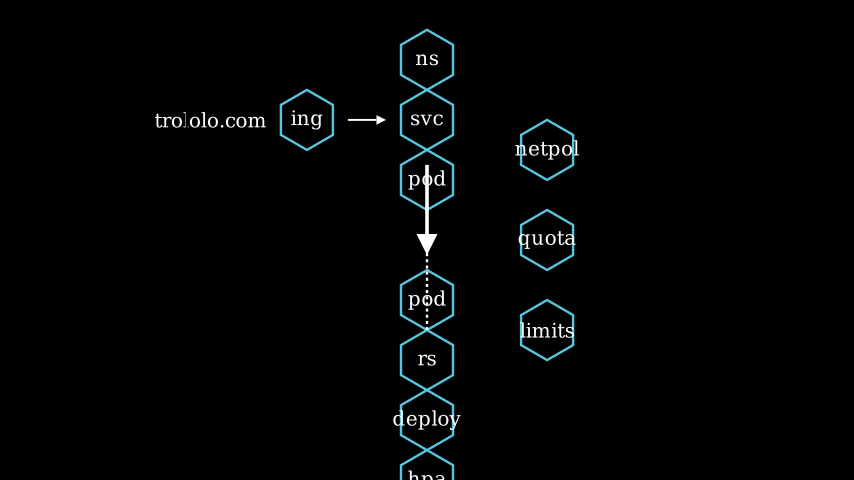

In [7]:
%%manim -ql -v ERROR KubernetesDiagram

class KubernetesDiagram(Scene):
    def construct(self):
        # Create Kubernetes components with labels
        ns = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(UP*3)
        ns_label = Text("ns").scale(0.5).move_to(ns.get_center())
        
        ingress = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(UP*2 + LEFT*2)
        ingress_label = Text("ing").scale(0.5).move_to(ingress.get_center())
        
        svc = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(UP*2)
        svc_label = Text("svc").scale(0.5).move_to(svc.get_center())
        
        pod1 = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(UP)
        pod1_label = Text("pod").scale(0.5).move_to(pod1.get_center())
        
        pod2 = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(DOWN)
        pod2_label = Text("pod").scale(0.5).move_to(pod2.get_center())
        
        rs = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(DOWN*2)
        rs_label = Text("rs").scale(0.5).move_to(rs.get_center())
        
        deploy = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(DOWN*3)
        deploy_label = Text("deploy").scale(0.5).move_to(deploy.get_center())
        
        hpa = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(DOWN*4)
        hpa_label = Text("hpa").scale(0.5).move_to(hpa.get_center())
        
        netpol = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(RIGHT*2 + UP*1.5)
        netpol_label = Text("netpol").scale(0.5).move_to(netpol.get_center())
        
        quota = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(RIGHT*2)
        quota_label = Text("quota").scale(0.5).move_to(quota.get_center())
        
        limits = RegularPolygon(n=6, color=BLUE).rotate(PI/2).scale(0.5).move_to(RIGHT*2 + DOWN*1.5)
        limits_label = Text("limits").scale(0.5).move_to(limits.get_center())
        
        # Create arrows
        arrows = [
            Arrow(ingress.get_right(), svc.get_left()),
            Arrow(svc.get_bottom(), pod1.get_top()),
            Arrow(svc.get_bottom(), pod2.get_top()),
            DashedLine(pod1.get_bottom(), rs.get_top()),
            DashedLine(pod2.get_bottom(), rs.get_top()),
            Arrow(rs.get_bottom(), deploy.get_top()),
            Arrow(deploy.get_bottom(), hpa.get_top())
        ]
        
        # Add components and labels to the scene
        self.add(ns, ns_label, ingress, ingress_label, svc, svc_label, pod1, pod1_label, pod2, pod2_label,
                 rs, rs_label, deploy, deploy_label, hpa, hpa_label, netpol, netpol_label, quota, quota_label, 
                 limits, limits_label, *arrows)
        
        # Add text label for domain
        domain_label = Text("trololo.com").scale(0.5).next_to(ingress, LEFT)
        self.add(domain_label)
        
        # Create a border around the diagram
        border = RoundedRectangle(corner_radius=0.5, width=8, height=10, color=BLACK).shift(DOWN)
        self.add(border)
        
        # Rotate the entire scene 90 degrees clockwise
        # self.play(Rotate(self.camera.frame, angle=-PI/2))


Pliki oryginalny

![obraz oryginalny](./std-app.png)

Manim Community v0.18.1

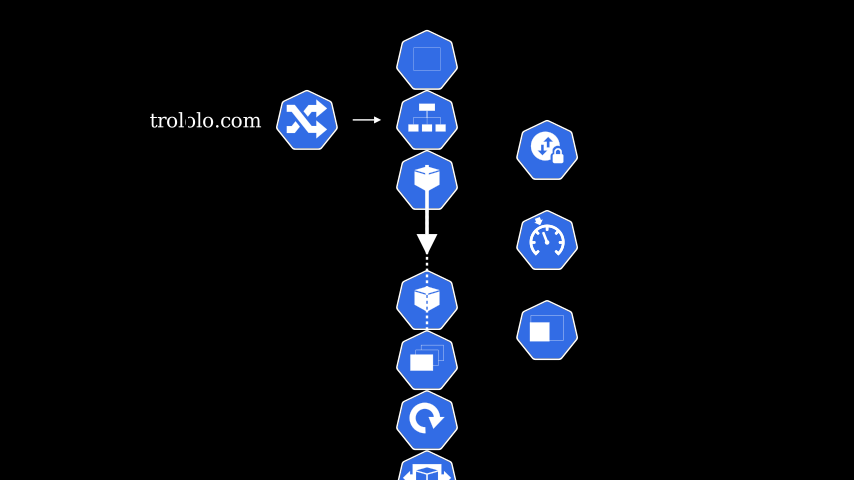

In [4]:
%%manim -ql -v ERROR KubernetesDiagramWithSVG

class KubernetesDiagramWithSVG(Scene):
    def construct(self):
        # Load SVG files
        ns = SVGMobject("svg_icons/ns.svg").scale(0.5).move_to(UP*3)
        ingress = SVGMobject("svg_icons/ing.svg").scale(0.5).move_to(UP*2 + LEFT*2)
        svc = SVGMobject("svg_icons/svc.svg").scale(0.5).move_to(UP*2)
        pod1 = SVGMobject("svg_icons/pod.svg").scale(0.5).move_to(UP)
        pod2 = SVGMobject("svg_icons/pod.svg").scale(0.5).move_to(DOWN)
        rs = SVGMobject("svg_icons/rs.svg").scale(0.5).move_to(DOWN*2)
        deploy = SVGMobject("svg_icons/deploy.svg").scale(0.5).move_to(DOWN*3)
        hpa = SVGMobject("svg_icons/hpa.svg").scale(0.5).move_to(DOWN*4)
        netpol = SVGMobject("svg_icons/netpol.svg").scale(0.5).move_to(RIGHT*2 + UP*1.5)
        quota = SVGMobject("svg_icons/quota.svg").scale(0.5).move_to(RIGHT*2)
        limits = SVGMobject("svg_icons/limits.svg").scale(0.5).move_to(RIGHT*2 + DOWN*1.5)
        
        # Create arrows
        arrows = [
            Arrow(ingress.get_right(), svc.get_left()),
            Arrow(svc.get_bottom(), pod1.get_top()),
            Arrow(svc.get_bottom(), pod2.get_top()),
            DashedLine(pod1.get_bottom(), rs.get_top()),
            DashedLine(pod2.get_bottom(), rs.get_top()),
            Arrow(rs.get_bottom(), deploy.get_top()),
            Arrow(deploy.get_bottom(), hpa.get_top())
        ]
        
        # Add components to the scene
        self.add(ns, ingress, svc, pod1, pod2, rs, deploy, hpa, netpol, quota, limits, *arrows)
        
        # Add text label for domain
        domain_label = Text("trololo.com").scale(0.5).next_to(ingress, LEFT)
        self.add(domain_label)
        
        # Create a border around the diagram
        border = RoundedRectangle(corner_radius=0.5, width=8, height=10, color=BLACK).shift(DOWN)
        self.add(border)
        
        # Rotate the entire scene 90 degrees clockwise
        # self.play(Rotate(self.camera.frame, angle=-PI/2))
